In [7]:
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
from glob import glob
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

root_dir = "/content/drive/MyDrive/"
#import os
#os.chdir(root_dir + 'Projects8/')

Mounted at /content/drive/


In [8]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import Add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model


In [10]:
incept_model = ResNet50(include_top=True)
last = incept_model.layers[-2].output
CNNmodel = Model(inputs = incept_model.input,outputs = last)

In [11]:
import pickle

# Path to your feature pickle file
feature_pickle_file = '/content/drive/MyDrive/Projects8/picklefiles/words_dict.pkl'

# Initialize an empty dictionary to store the data
words_dict = {}

# Open the pickle file for reading
with open(feature_pickle_file, 'rb') as f:
    # Load the data from the pickle file
    words_dict = pickle.load(f)

    # Store the data in the dictionary
   # words_dict['data'] = feature_data

# Optionally, you can add more key-value pairs to the dictionary if needed

# Print the dictionary to verify the contents
#print(feature_dict)


In [12]:
with open('/content/drive/MyDrive/Project/Final_Dataset/notebooks/image para/captions_dict_train.pkl', 'rb') as f:
    # Load the data from the pickle file
    captions_dict_train = pickle.load(f)
vocab_size = len(words_dict)+1
MAX_LEN = 0

for k, v in captions_dict_train.items():
    if len(v) > MAX_LEN:
        MAX_LEN = len(v)

inv_dict = {v:k for k, v in words_dict.items()}

In [ ]:
inv_dict

{1: 'startofseq',
 2: 'a',
 3: 'white',
 4: 'round',
 5: 'plate',
 6: 'is',
 7: 'on',
 8: 'table',
 9: 'with',
 10: 'plastic',
 11: 'tablecloth',
 12: 'it',
 13: '.',
 14: 'two',
 15: 'foil',
 16: 'covered',
 17: 'food',
 18: 'halves',
 19: 'are',
 20: 'the',
 21: 'along',
 22: 'serving',
 23: 'of',
 24: 'golden',
 25: 'yellow',
 26: 'french',
 27: 'fries',
 28: 'next',
 29: 'to',
 30: 'in',
 31: 'short,',
 32: 'container',
 33: 'sauce',
 34: 'diagonal',
 35: 'edges',
 36: 'several',
 37: 'other',
 38: 'stacked',
 39: 'plates',
 40: 'there',
 41: 'black',
 42: 'shadows',
 43: 'reflected',
 44: 'endofseq',
 45: 'large',
 46: 'red',
 47: 'and',
 48: 'train',
 49: 'traveling',
 50: 'tracks',
 51: 'what',
 52: 'looks',
 53: 'be',
 54: 'rural',
 55: 'area',
 56: 'trees',
 57: 'hills',
 58: 'background',
 59: 'ground',
 60: 'dry',
 61: 'has',
 62: 'many',
 63: 'windows',
 64: 'for',
 65: 'passengers',
 66: 'look',
 67: 'out',
 68: 'mostly',
 69: 'front',
 70: 'upper',
 71: 'part',
 72: 'stri

In [ ]:
# Print the first 5 key-value pairs of the captions_dict_train dictionary

count = 0
for key, value in captions_dict_train.items():
    if count < 5:
        print(key, ":", value)
        count += 1
    else:
        break


Converting images to features using CNN model
Image reading successful
1/1 [==============================] - 2s 2s/step
[0.         0.08324311 0.2511368  ... 0.03651195 0.0172365  0.6932282 ]
1/1 [==============================] - 0s 143ms/step


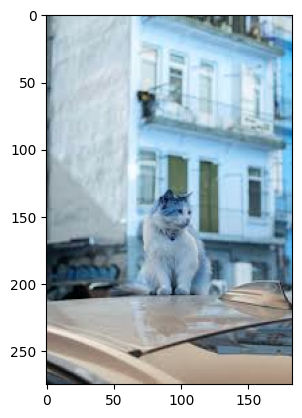

 a white and white house is on the side of a street. there is a white stripe on the side of the bus. there is a white car parked on the street next to the car. there is a white van on the street in front of the building. there is a white van on the street in front of the building. 


In [13]:
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
model = tf.keras.models.load_model('/content/drive/MyDrive/Project/Final_Dataset/notebooks/image para/image_caption_model_newarch75.h5')
img_name='catbuilding.jpg'
test_img_path = '/content/catbuilding.jpg'
image_features = {}
#count = 0
print("Converting images to features using CNN model")
#for i in images:
img = cv2.imread(test_img_path)
if img is not None:
    print("Image reading successful")
else:
    print("Image reading unsuccessful")
#cv2.imshow('Image', img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = img.reshape(1,224,224,3)
pred = CNNmodel.predict(img).reshape(2048,)
test_feature=pred
#img_name = i.split('/')[-1]
print(pred)
# images_features[img_name] = pred
# test_feature = images_features[img_name]
# #test_img_path = '/kaggle/input/coco-2017-dataset/coco2017/test2017'+img_name
test_img = cv2.imread(test_img_path)
# test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


text_inp = ['startofseq']
count = 0
caption = ''
while count < 271:
    count += 1
    encoded = []
    for i in text_inp:
        encoded.append(words_dict[i])
    encoded = [encoded]
    encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=271)
    data_list=[np.array(test_feature).reshape(1,-1), np.array(encoded).reshape(1,-1)]
# Assuming your model expects an input shape of (None, 271)
# Reshape the output of ResNet50 to match the input shape expected by model_2
    #data_list[1] = pad_sequences(data_list[1], maxlen=271, padding='post')
    #print(data_list[1])
    prediction = np.argmax(model.predict(data_list))
    sampled_word = inv_dict[prediction]
    caption = caption + ' ' + sampled_word

    if sampled_word == 'endofseq':
        break
    text_inp.append(sampled_word)

caption= caption.replace('endofseq','')
predicted= caption.split()
#actual= captions_dict_test[img_name].split()

# blueScore= sentence_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25))

# print('BLEU-1: %f' % sentence_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
# print('BLEU-2: %f' % sentence_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
# print('BLEU-3: %f' % sentence_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
# print('BLEU-4: %f' % sentence_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

plt.figure()
plt.imshow(test_img)
#plt.title(img_name+" - BLUE Score: "+str(blueScore))
plt.show()
print(caption.replace(' .','.'))

Converting images to features using CNN model
Image reading successful
1/1 [==============================] - 0s 339ms/step
[0.50597763 0.9017222  0.11542151 ... 0.02129029 0.3804033  0.        ]
1/1 [==============================] - 0s 167ms/step


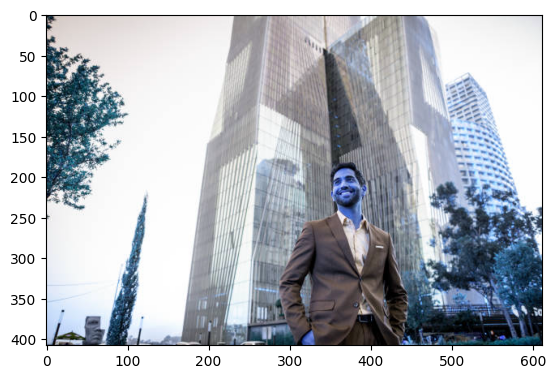

 a man is standing on a road outside holding a camera to his face. he is wearing a short sleeve shirt and pants. the man is wearing a black cap, a white shirt and blue pants. the man is holding a folder under his arm. a man is standing on the side of the road. a tall building is standing behind the man. part of a white sky can be seen above the trees. 


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
model = tf.keras.models.load_model('/content/drive/MyDrive/Project/Final_Dataset/notebooks/image para/image_caption_model_newarch75.h5')
img_name='buildingman.jpg'
test_img_path = '/content/buildingman.jpg'
image_features = {}
#count = 0
print("Converting images to features using CNN model")
#for i in images:
img = cv2.imread(test_img_path)
if img is not None:
    print("Image reading successful")
else:
    print("Image reading unsuccessful")
#cv2.imshow('Image', img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = img.reshape(1,224,224,3)
pred = CNNmodel.predict(img).reshape(2048,)
test_feature=pred
#img_name = i.split('/')[-1]
print(pred)
# images_features[img_name] = pred
# test_feature = images_features[img_name]
# #test_img_path = '/kaggle/input/coco-2017-dataset/coco2017/test2017'+img_name
test_img = cv2.imread(test_img_path)
# test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


text_inp = ['startofseq']
count = 0
caption = ''
while count < 271:
    count += 1
    encoded = []
    for i in text_inp:
        encoded.append(words_dict[i])
    encoded = [encoded]
    encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=271)
    data_list=[np.array(test_feature).reshape(1,-1), np.array(encoded).reshape(1,-1)]

    prediction = np.argmax(model.predict(data_list))
    sampled_word = inv_dict[prediction]
    caption = caption + ' ' + sampled_word

    if sampled_word == 'endofseq':
        break
    text_inp.append(sampled_word)

caption= caption.replace('endofseq','')
predicted= caption.split()

plt.figure()
plt.imshow(test_img)
#plt.title(img_name+" - BLUE Score: "+str(blueScore))
plt.show()
print(caption.replace(' .','.'))

In [ ]:
inv_dict

{1: 'startofseq',
 2: 'a',
 3: 'white',
 4: 'round',
 5: 'plate',
 6: 'is',
 7: 'on',
 8: 'table',
 9: 'with',
 10: 'plastic',
 11: 'tablecloth',
 12: 'it',
 13: '.',
 14: 'two',
 15: 'foil',
 16: 'covered',
 17: 'food',
 18: 'halves',
 19: 'are',
 20: 'the',
 21: 'along',
 22: 'serving',
 23: 'of',
 24: 'golden',
 25: 'yellow',
 26: 'french',
 27: 'fries',
 28: 'next',
 29: 'to',
 30: 'in',
 31: 'short,',
 32: 'container',
 33: 'sauce',
 34: 'diagonal',
 35: 'edges',
 36: 'several',
 37: 'other',
 38: 'stacked',
 39: 'plates',
 40: 'there',
 41: 'black',
 42: 'shadows',
 43: 'reflected',
 44: 'endofseq',
 45: 'large',
 46: 'red',
 47: 'and',
 48: 'train',
 49: 'traveling',
 50: 'tracks',
 51: 'what',
 52: 'looks',
 53: 'be',
 54: 'rural',
 55: 'area',
 56: 'trees',
 57: 'hills',
 58: 'background',
 59: 'ground',
 60: 'dry',
 61: 'has',
 62: 'many',
 63: 'windows',
 64: 'for',
 65: 'passengers',
 66: 'look',
 67: 'out',
 68: 'mostly',
 69: 'front',
 70: 'upper',
 71: 'part',
 72: 'stri

In [ ]:
# Assuming captions_dict_train contains the captions data in the current format

# Initialize a new dictionary to store the transformed captions
transformed_captions_dict_train = {}

# Iterate through the items in the original dictionary
for image_name, caption in captions_dict_train['data'].items():
    # Initialize a list to store the transformed caption
    transformed_caption = []

    # Split the original caption into words
    words = caption.split()
    print(words)
    # Map each word to its corresponding integer value using words_dict
    for word in words:
        if word in words_dict:
            transformed_caption.append(words_dict[word])
        else:
            print("ji")
    # Store the transformed caption in the new dictionary
    transformed_captions_dict_train[image_name] = transformed_caption

# Print the first 5 key-value pairs of the transformed dictionary
count = 0
for image_name, transformed_caption in transformed_captions_dict_train.items():
    if count < 5:
        print(image_name, ":", transformed_caption)
        count += 1
    else:
        break


In [ ]:
caption_path = '/content/stanford_df_rectified.csv'

with open(caption_path) as csvfile:
    captions=csv.reader(csvfile, delimiter=',', quotechar='"')
    captions_dict_train,captions_dict_test,captions_dict_val= {},{},{}
    for i in captions:
        try:
            img_name = i[0]  + ".jpg"
            caption = i[1]
            train_input=i[2]
            test_input=i[3]
            val_input=i[5]
            if img_name in images_features:
                if train_input=='True':
                    captions_dict_train[img_name] = caption
                elif test_input=='True':
                    captions_dict_test[img_name] = caption
                elif val_input=='True':
                    captions_dict_val[img_name] = caption
        except:
            pass

print("size of train, test and validation dataset:" ,len(captions_dict_train),len(captions_dict_test),len(captions_dict_val))

size of train, test and validation dataset: 0 0 0


In [ ]:
import pickle

# Path to your feature pickle file
feature_pickle_file = '/content/captions_dict_train_preprocessed.pkl'

# Initialize an empty dictionary to store the data
captions_dict_train = {}

# Open the pickle file for reading
with open(feature_pickle_file, 'rb') as f:
    # Load the data from the pickle file
    feature_data = pickle.load(f)

    # Store the data in the dictionary
    captions_dict_train['data'] = feature_data

# Optionally, you can add more key-value pairs to the dictionary if needed
#captions_dict_train=captions_dict_train['data']
# Print the dictionary to verify the contents
print(captions_dict_train)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Print the first 5 key-value pairs of the captions_dict_train dictionary
count = 0

#captions_dict_train=captions_dict_train['data']
for key, value in captions_dict_train.items():
    if count < 5:
        print(key, ":", value)
        count += 1
    else:
        break

2317429.jpg : [1, 2, 3, 4, 5, 6, 7, 2, 8, 9, 2, 10, 11, 7, 12, 13, 14, 15, 16, 17, 18, 19, 7, 20, 3, 5, 21, 9, 2, 22, 23, 24, 25, 26, 27, 13, 28, 29, 20, 3, 5, 30, 2, 31, 10, 32, 6, 2, 3, 33, 13, 34, 29, 20, 3, 5, 19, 20, 35, 23, 36, 37, 38, 39, 13, 40, 19, 41, 42, 43, 7, 20, 8, 13, 44]
2365091.jpg : [1, 2, 45, 46, 47, 3, 48, 6, 49, 7, 50, 30, 2, 51, 52, 29, 53, 2, 54, 55, 13, 40, 19, 56, 47, 57, 30, 20, 58, 47, 20, 59, 52, 60, 13, 20, 48, 61, 62, 45, 63, 64, 20, 65, 29, 66, 67, 23, 13, 20, 48, 6, 68, 3, 9, 46, 7, 20, 69, 70, 71, 23, 20, 48, 47, 46, 72, 47, 73, 7, 20, 74, 13, 20, 75, 23, 20, 48, 6, 76, 13, 44]
2383120.jpg : [1, 2, 77, 78, 47, 79, 2, 80, 13, 81, 6, 2, 82, 83, 3, 13, 84, 80, 6, 85, 86, 47, 87, 13, 44]
2333990.jpg : [1, 40, 19, 88, 89, 90, 7, 2, 91, 92, 5, 13, 40, 19, 93, 30, 20, 94, 64, 95, 13, 20, 89, 90, 96, 97, 46, 98, 47, 99, 64, 100, 13, 20, 92, 5, 6, 101, 7, 2, 3, 8, 102, 13, 44]
2338364.jpg : [1, 2, 41, 47, 3, 103, 6, 101, 30, 2, 3, 104, 13, 20, 103, 6, 105, 106, 